In [2]:
!pip install tensorflow

In [4]:
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pathlib import Path
from PIL import Image
from tensorflow.keras import layers
from sklearn import preprocessing

In [38]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

# Define the base directory
base_dir = Path(r"C:\Users\purna\Documents\olympics")

# Get all image paths (supports .jpg, .png, .jpeg)
image_link = list(base_dir.glob("**/*.*"))
image_link = [x for x in image_link if x.suffix.lower() in {'.jpg', '.png', '.jpeg'}]

# Extract folder names as labels
image_name = [x.parent.stem for x in image_link]

# Encode labels
label_encoder = LabelEncoder()
image_label = label_encoder.fit_transform(image_name)

# Create DataFrame
df = pd.DataFrame({
    'link': [str(x) for x in image_link],  # Convert Paths to string
    'name': image_name,
    'label': image_label
})

# Display DataFrame
print(df.head())

# Save to CSV if needed
df.to_csv("image_data.csv", index=False)


                                                link       name  label
0  C:\Users\purna\Documents\olympics\athletics\at...  athletics      0
1  C:\Users\purna\Documents\olympics\athletics\at...  athletics      0
2  C:\Users\purna\Documents\olympics\athletics\at...  athletics      0
3  C:\Users\purna\Documents\olympics\athletics\at...  athletics      0
4  C:\Users\purna\Documents\olympics\athletics\at...  athletics      0


In [40]:
df

,link,name,label
0,C:\Users\purna\Documents\olympics\athletics\at...,athletics,0
1,C:\Users\purna\Documents\olympics\athletics\at...,athletics,0
2,C:\Users\purna\Documents\olympics\athletics\at...,athletics,0
3,C:\Users\purna\Documents\olympics\athletics\at...,athletics,0
4,C:\Users\purna\Documents\olympics\athletics\at...,athletics,0
...,...,...,...
995,C:\Users\purna\Documents\olympics\weightliftin...,weightlifting,9
996,C:\Users\purna\Documents\olympics\weightliftin...,weightlifting,9
997,C:\Users\purna\Documents\olympics\weightliftin...,weightlifting,9
998,C:\Users\purna\Documents\olympics\weightliftin...,weightlifting,9


In [58]:
import seaborn as sns

C:\Users\purna\AppData\Local\Temp\ipykernel_12840\408969269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['name'].value_counts().index, y=df['name'].value_counts().values, palette="viridis")


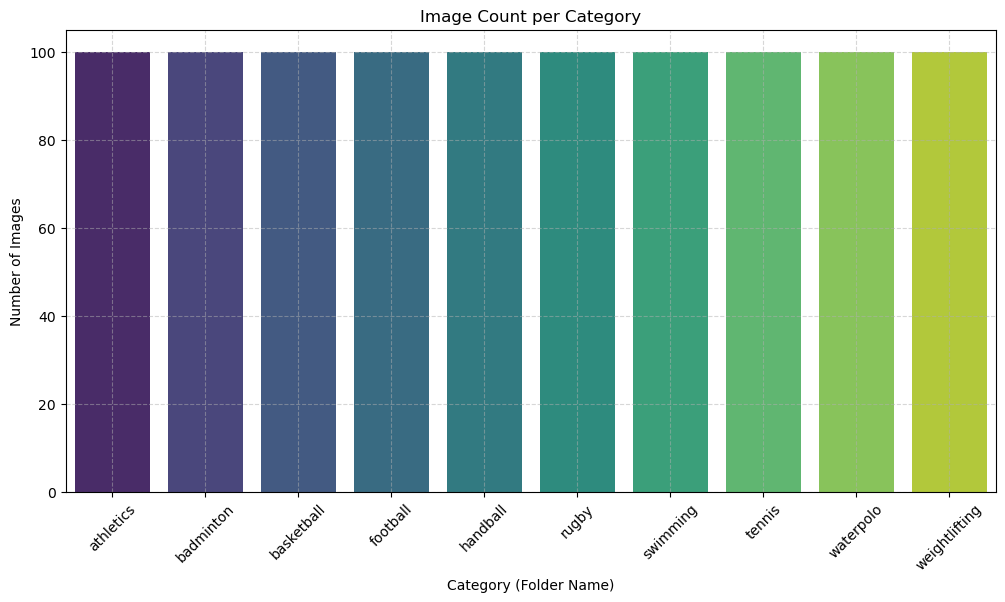

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['name'].value_counts().index, y=df['name'].value_counts().values, palette="viridis")
plt.xlabel("Category (Folder Name)")
plt.ylabel("Number of Images")
plt.title("Image Count per Category")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [70]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=1, stratify=df['name'])

# Define ImageDataGenerator for training and testing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.0)

# Load train images
train_images = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="link",
    y_col="name",
    color_mode="rgb",
    batch_size=32,
    target_size=(28, 28),
    class_mode="categorical"
)

# Load test images
test_images = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="link",
    y_col="name",
    color_mode="rgb",
    batch_size=32,
    target_size=(28, 28),
    class_mode="categorical"
)

Found 700 validated image filenames belonging to 10 classes.
Found 300 validated image filenames belonging to 10 classes.


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [76]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_images.class_indices), activation='softmax')
])

C:\Users\purna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [80]:
history = model.fit(train_images, validation_data=test_images, epochs=10)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 712ms/step - accuracy: 0.0921 - loss: 2.3084

C:\Users\purna\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.0931 - loss: 2.3077 - val_accuracy: 0.2567 - val_loss: 2.2530
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 546ms/step - accuracy: 0.1710 - loss: 2.2251 - val_accuracy: 0.2500 - val_loss: 2.0551
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 529ms/step - accuracy: 0.1987 - loss: 2.0659 - val_accuracy: 0.2633 - val_loss: 1.9528
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 534ms/step - accuracy: 0.2477 - loss: 1.9606 - val_accuracy: 0.2767 - val_loss: 1.8774
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 533ms/step - accuracy: 0.3200 - loss: 1.8636 - val_accuracy: 0.3833 - val_loss: 1.8047
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 532ms/step - accuracy: 0.3380 - loss: 1.8086 - val_accuracy: 0.3767 - val_loss: 1.7127
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 545ms/step - accuracy: 0.3813 - loss: 1.6717 - val_accuracy: 0.4300 - val_loss: 1.6138
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 538ms/step - accuracy: 0.3768 - loss: 1.6644 - val_accuracy: 0.4533 -

In [81]:
model.save("image_classification_model.h5")

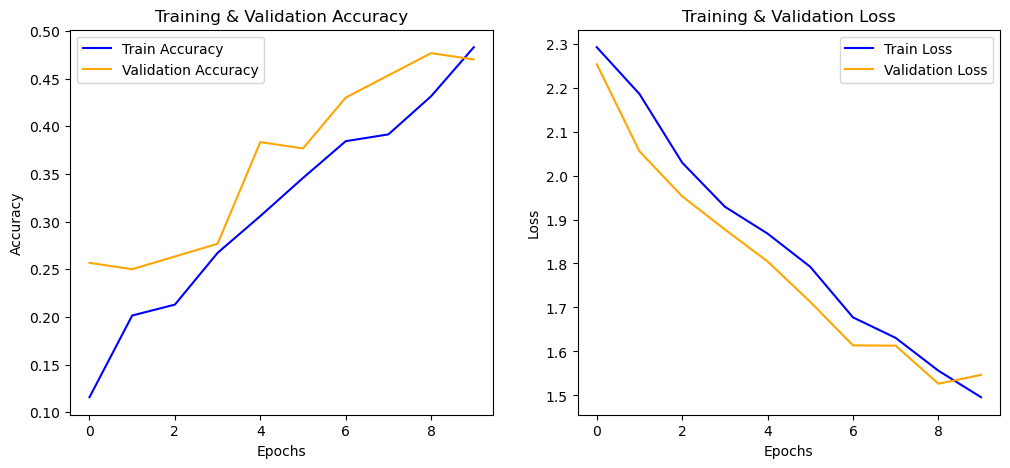

In [84]:
# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()


In [88]:
from scipy.stats import ttest_ind, f_oneway

# Convert history data to DataFrame
import pandas as pd
history_df = pd.DataFrame(history.history)

# T-Test: Compare train and validation accuracy
t_stat, p_value = ttest_ind(history_df['accuracy'], history_df['val_accuracy'])
print(f"T-Test: t-stat={t_stat}, p-value={p_value}")

# ANOVA Test: Compare train loss, validation loss, and accuracy
anova_stat, anova_p = f_oneway(history_df['loss'], history_df['val_loss'], history_df['accuracy'])
print(f"ANOVA Test: F-stat={anova_stat}, p-value={anova_p}")

T-Test: t-stat=-1.0624702189624562, p-value=0.30206972398606097
ANOVA Test: F-stat=160.65437380687905, p-value=1.0159952164315479e-15


In [98]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(28, 28))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_label = list(train_images.class_indices.keys())[np.argmax(prediction)]
    
    print(f"Predicted Label: {class_label}")

#predict_image(r"C:\Users\purna\Downloads\b1.jpg")
predict_image(r"C:\Users\purna\Downloads\f1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Label: badminton


In [108]:
predict_image(r"C:\Users\purna\Downloads\handball0.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Label: handball


In [110]:
predict_image(r"C:\Users\purna\Downloads\rugby1.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Label: rugby


In [112]:
predict_image(r"C:\Users\purna\Downloads\badminton0.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted Label: badminton


In [122]:
# Check if the image paths in DataFrame are correct
print(df['link'].head())  # Verify paths
print("Total number of images:", len(df))

# Make sure the paths in ImageDataGenerator are valid
train_images = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="link",
    y_col="name",
    color_mode="rgb",
    batch_size=32,
    target_size=(28, 28),
    class_mode="categorical"
)

# Verify some of the image paths
for img_path in test_images.filepaths[:5]:  # Check the first 5 file paths
    print(f"Image Path: {img_path}")


0    C:\Users\purna\Documents\olympics\athletics\at...
1    C:\Users\purna\Documents\olympics\athletics\at...
2    C:\Users\purna\Documents\olympics\athletics\at...
3    C:\Users\purna\Documents\olympics\athletics\at...
4    C:\Users\purna\Documents\olympics\athletics\at...
Name: link, dtype: object
Total number of images: 1000
Found 697 validated image filenames belonging to 10 classes.
Image Path: C:\Users\purna\Documents\olympics\swimming\swimming21.png
Image Path: C:\Users\purna\Documents\olympics\basketball\basketball22.png
Image Path: C:\Users\purna\Documents\olympics\basketball\basketball84.png
Image Path: C:\Users\purna\Documents\olympics\swimming\swimming25.png
Image Path: C:\Users\purna\Documents\olympics\handball\handball15.png


C:\Users\purna\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="link". These filename(s) will be ignored.
  warnings.warn(


In [124]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get the true labels and predicted labels
y_true = test_images.classes
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_images.class_indices.keys(), yticklabels=train_images.class_indices.keys())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=train_images.class_indices.keys()))

 4/10 ━━━━━━━━━━━━━━━━━━━━ 3s 527ms/step

UnknownError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\purna\\Documents\\olympics\\handball\\handball0.png'
Traceback (most recent call last):

  File "C:\Users\purna\anaconda3\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "C:\Users\purna\anaconda3\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\purna\anaconda3\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\purna\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "C:\Users\purna\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\purna\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\purna\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py", line 235, in load_img
    with open(path, "rb") as f:
         ^^^^^^^^^^^^^^^^

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\purna\\Documents\\olympics\\handball\\handball0.png'


	 [[{{node PyFunc}}]] [Op:IteratorGetNext] name: 

In [126]:
# Verify the first 5 image paths in your DataFrame
print(df['link'].head())  # Check the paths for the first few images


0    C:\Users\purna\Documents\olympics\athletics\at...
1    C:\Users\purna\Documents\olympics\athletics\at...
2    C:\Users\purna\Documents\olympics\athletics\at...
3    C:\Users\purna\Documents\olympics\athletics\at...
4    C:\Users\purna\Documents\olympics\athletics\at...
Name: link, dtype: object


In [128]:
import os

# Check if the file exists
image_path = 'C:\\Users\\purna\\Documents\\olympics\\handball\\handball0.png'
if not os.path.exists(image_path):
    print(f"File not found: {image_path}")
else:
    print(f"File exists: {image_path}")


File not found: C:\Users\purna\Documents\olympics\handball\handball0.png
